In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#                                           Theory
```js
        The whole theory and process of "Logistic Regression using Sigmoid" is written in "1. Logistic Regression Perceptron Trick.pdf" inside Theory folder.
```

#                                                   Dataset Creation and Visualization
```js
        Below cell I created a dataset(given below in the Polar Dataframe form) with 2 Input columns and 1 Output column. For simplicity purpose I created a 2D Dataset(2 Input Columns where "each row of x1 and x2 form the coordinates of a Point") so I can easily make 2D Scatterplot and later draw the Boundary Line.

        shape: (100, 3)
        ┌───────────┬───────────┬─────┐
        │ x1        ┆ x2        ┆ y   │
        │ ---       ┆ ---       ┆ --- │
        │ f64       ┆ f64       ┆ i32 │
        ╞═══════════╪═══════════╪═════╡
        │ 0.355239  ┆ -0.116976 ┆ 1   │
        │ -0.092828 ┆ -0.731152 ┆ 1   │
        │ -0.198498 ┆ -0.708106 ┆ 1   │
        │ -2.440011 ┆ -2.011992 ┆ 0   │
        │ -0.044848 ┆ 1.634932  ┆ 1   │
        │ …         ┆ …         ┆ …   │
        │ -2.972473 ┆ 0.661988  ┆ 0   │
        │ -2.385144 ┆ 0.071533  ┆ 0   │
        │ -2.309493 ┆ 0.323236  ┆ 0   │
        │ 0.992258  ┆ -0.345742 ┆ 1   │
        │ -0.109714 ┆ 0.064999  ┆ 1   │
        └───────────┴───────────┴─────┘
```

#                                   Split the Dataset and Train the Model.

Intercept = 3.03219700421114.
Coefficient = [3.444036  0.1221417].


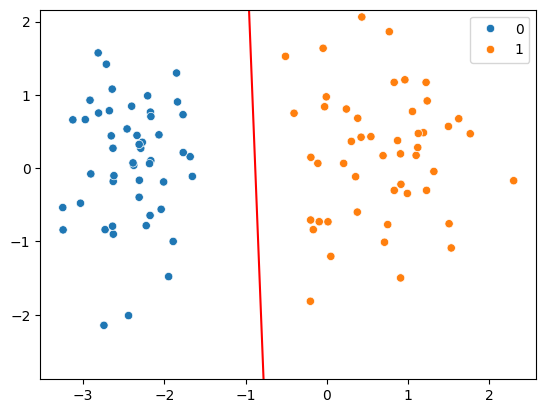

In [36]:
class Logistic_Perceptron: # I didn't put the predict function because campusx didn't write it in their tutorial.
    def __init__(self, learning_rate:float, epochs:int):
        self.coeff_ = None
        self.intercept = None 
        self.epochs = epochs
        self.lr = learning_rate
    
    def sigmoid(self, line: float) -> float: # line = w0x0 + w1x1 .... + wmxm.
        return 1 / (1 + np.exp(-line))
    
    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        x_train = np.insert(arr=x_train, obj=0, values=1, axis=1) # (80, 3). axis=1 means insert 1 as the first(obj=0) column.
        n, m = x_train.shape # 80, 3.
        W = np.ones(shape=(m)) # (3). W = weights(w0, w1, w2, w2 ...).

        for epoch in range(1000):
            # For each epoch, we update the Line(i.e. line's weights(w0, w1 ... wm)) based on a single Point(x).
            # y = Actual output, positive(1) or negative(0) region. y_hat = Sigmoid Output (from 0 to 1) by the current Line.
            random_index = np.random.randint(low=0, high=n) # Scalar.
            x, y = x_train[random_index], y_train[random_index] # Scalar, Scalar.

            y_hat = self.sigmoid(np.dot(W, x)) # dot((3), (3)) = Scalar.
            W = W + (y - y_hat) * self.lr * x # (3).
        
        self.intercept, self.coeff_ = W[0], W[1:]

        print(f"Intercept = {self.intercept}.")
        print(f"Coefficient = {self.coeff_}.")

def main():
    #               Create Dataset, split it for training and testing, fit it to the model.

    X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                               n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=15)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) # (80, 2), (20, 2), (80), (20).

    lp = Logistic_Perceptron(learning_rate=0.1, epochs=1000) # To see how it works, watch "perceptron.gif".
    lp.fit(x_train, y_train)

    #               Drawing the Boundary Line. (Explained in "2.Logistic Regression Line.pdf" in Theory folder)

    m = -(lp.coeff_[0] / lp.coeff_[1]) # -(A/B)
    b = -(lp.intercept / lp.coeff_[1]) # -(Intercept/B)

    x_axis, y_axis = X[:, 0], X[:, 1] # The First Column, the Second Column.
    x_line = np.array([x_axis.min(), x_axis.max()])
    y_line = m * x_line + b

    sns.scatterplot(x = x_axis, y = y_axis, hue=y)
    sns.lineplot(x = x_line, y = y_line, color='red')
    plt.ylim((y_axis.min() + 0.1, y_axis.max() + 0.1))

if __name__ == "__main__":
    main()

#                                                       Problems faced
```js
        From "problem.png", we can see that from Perceptron model we''ve improved but still the Boundary Line is not staight but close to. 
```